# Introduction to NumPy

In [2]:
# Imports required but not shown in the video lecture.
import numpy

from numpy import array, linspace, pi, sin
from numpy.random import randn
from numpy.fft import fft, fftfreq, fftshift
from matplotlib.pyplot import (axis, figure, grid, plot, semilogy, 
                               subplot, title, xlabel, ylabel)
%matplotlib inline

In [ ]:
print numpy.__version__

This quick tour reviews a few of the defining features of NumPy arrays as motivation for where they might fit into your day-to-day needs.  

Mathematical Operations
-----------------------

By now, we're pretty use to lists being the workhorse sequential data structure in Python.  It's great for many things, but it turns out that another data structure, the NumPy array, provides a different set of functionality that is really useful -- especially for numeric computations.

Here we start with a list, and illustrate the difference in syntax for mathematical operations on a list and an array.

Imagine you want to add 1 to every element in a sequence.  Here is a comparison between doing this with an array 
and a list.

Let's look at a list

In [ ]:
a = [1, 2, 3, 4]
a

If you add 1 to a list, you get an error because you can't add list and int types.

In [ ]:
a+1

This will work, but it is a bit cryptic to the uninitiated:

In [ ]:
[val + 1 for val in a]

But if we convert `a` to a NumPy `array`, then it does work:

In [ ]:
a = array(a)
a+1

This is the first thing that the array provides: when you perform a mathematical operation on an array, the operation is performed on every element of the array.  So the result is 1+1 is 2, 2+1 is 3, 3+1 is 4 and 4+1 is 5.

Operations on two Arrays
------------------------

NumPy always carries out element-by-element operations when operating on two arrays.  Here are several examples with `+`,`*`, and `**` operators.

Let's create another array `b`:

In [ ]:
b = array([2, 3, 4, 5])

They both have 4 elements.  If we add a and b:

In [ ]:
a + b

then the operation is performed element-by-element: 1+2 is 3, 2+3 is 5, 3+4 is 7 and 4+5 is 9.

This doesn't just work for addition.  You can multiply:

In [ ]:
a*b

You can exponentiate:

In [ ]:
a**b

All operations are performed element-by-element.

Selecting Elements from an Array
--------------------------------

You can index arrays like lists:

In [ ]:
a[0]

You can also slice:

In [ ]:
a[:2]

In [ ]:
a[-2:]

You could even take the first 2 and add to the last 2:

In [ ]:
a[:2] + a[-2:]

Multi-dimensional Arrays
------------------------

Arrays can have more than one dimension.  Here we reshape the `a` array so that it has a two rows and two columns

Arrays have a `shape`:

In [ ]:
a.shape

and we can change its shape on the fly:

In [ ]:
a.shape = (2, 2)
a

and now `a` is a 2-by-2 array.

If you multiply a by itself:

In [ ]:
a*a

Notice that mathematical operations, even on a 2D array, are element-by-element operations.  `*` is not overloaded to mean matrix multiplication.  In this way, all operations are always consistent, no matter what dimensionality the arrays are. (There is a `numpy.matrix` object if you want the matrix operation behavior.)

Plotting
--------

NumPy and matplotlib combine to providing a nice toolset for calculations and visualizations of your data.

Let's create another array with `linspace`:

In [3]:
a = linspace(0, 2*pi, 21)

this creates an array from 0 to $2\pi$ with 21 values:

In [5]:
# Set the printout precision to only show 3 decimal values.
%precision 3

u'%.3f'

In [6]:
a

array([ 0.   ,  0.314,  0.628,  0.942,  1.257,  1.571,  1.885,  2.199,
        2.513,  2.827,  3.142,  3.456,  3.77 ,  4.084,  4.398,  4.712,
        5.027,  5.341,  5.655,  5.969,  6.283])

I can then say:

In [7]:
b = sin(a)
b

array([  0.000e+00,   3.090e-01,   5.878e-01,   8.090e-01,   9.511e-01,
         1.000e+00,   9.511e-01,   8.090e-01,   5.878e-01,   3.090e-01,
         1.225e-16,  -3.090e-01,  -5.878e-01,  -8.090e-01,  -9.511e-01,
        -1.000e+00,  -9.511e-01,  -8.090e-01,  -5.878e-01,  -3.090e-01,
        -2.449e-16])

We'd really like to plot these:

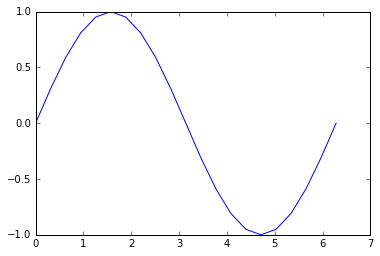

In [8]:
plot(a, b)

Querying an Array
-----------------

And someone might ask, where in this plot are the values of b greater than 0?

In [10]:
b >= 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

This is a boolean mask array of True and False values.

We can put this into a variable:

In [9]:
mask = b >= 0

and then we could even ask to plot the values where this condition holds over the top of the other plot (with red circle markers):

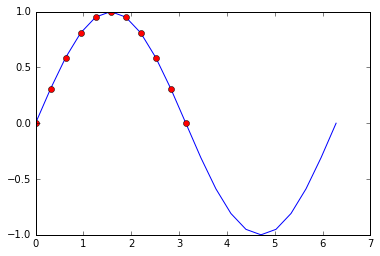

In [11]:
plot(a, b)
plot(a[mask], b[mask], 'ro')

This should give you an idea of the sorts of things you can do.

A More Complex Example
----------------------

Let's do a more involved example.  First we create a slightly noisy 5 Hz signal which is 3 seconds long with 1001 samples:

In [ ]:
T= 3.0
N = 1001

t = linspace(0, T, N)
y = sin(5*t*2*pi) + 0.2 * randn(N)

Now let's find the frequency content of the signal:

In [ ]:
F = fftfreq(N, T/N)
Y = fft(y)
P = (abs(Y)/N)**2

And then display the signal and its frequency data on a semi-log plot:

In [ ]:
figure(figsize=(14, 10))
subplot(1, 2, 1)
plot(t, y)
xlabel('t (seconds)')
ylabel('Amplitude')
title('Signal')

subplot(1, 2, 2)
semilogy(fftshift(F), fftshift(P))
axis(xmin=-10, xmax=10, ymin=0, ymax=1)
xlabel('Hz')
ylabel('Power (dB)')
title('Frequency Domain')
grid(True)

Copyright 2008-2016, Enthought, Inc.<br>Use only permitted under license.  Copying, sharing, redistributing or other unauthorized use strictly prohibited.<br>http://www.enthought.com